In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader as data

In [8]:
import yfinance as yf
from pandas_datareader import data as pdr

# Manually override pandas_datareader's get_data_yahoo to use yfinance
pdr.get_data_yahoo = yf.download

start = '2010-01-01'
end = '2019-12-31'

df = pdr.get_data_yahoo('AAPL', start=start, end=end)
df.head()



C:\Users\amees\AppData\Local\Temp\ipykernel_23164\1551364664.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = pdr.get_data_yahoo('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.424604,6.439314,6.375672,6.407193,493729600
2010-01-05,6.435713,6.472038,6.401790,6.442318,601904800
2010-01-06,6.333345,6.461231,6.326741,6.435714,552160000
2010-01-07,6.321636,6.364265,6.275705,6.356760,477131200
2010-01-08,6.363666,6.364267,6.276008,6.313232,447610800


In [9]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.589760,68.650138,67.713066,67.751709,98572000
2019-12-24,68.654976,68.804720,68.328939,68.756415,48478800
2019-12-26,70.017097,70.034005,68.758816,68.787796,93121200
2019-12-27,69.990570,70.997684,69.584829,70.309369,146266000
2019-12-30,70.405952,70.688526,68.884422,69.908436,144114400


In [11]:
df = df.reset_index()
df.head()

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,2010-01-04,6.424604,6.439314,6.375672,6.407193,493729600
1,1,2010-01-05,6.435713,6.472038,6.401790,6.442318,601904800
2,2,2010-01-06,6.333345,6.461231,6.326741,6.435714,552160000
3,3,2010-01-07,6.321636,6.364265,6.275705,6.356760,477131200
4,4,2010-01-08,6.363666,6.364267,6.276008,6.313232,447610800


In [12]:
df = df.drop(['Date'], axis=1)
df.head()

C:\Users\amees\AppData\Local\Temp\ipykernel_23164\2218488136.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,index,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,6.424604,6.439314,6.375672,6.407193,493729600
1,1,6.435713,6.472038,6.401790,6.442318,601904800
2,2,6.333345,6.461231,6.326741,6.435714,552160000
3,3,6.321636,6.364265,6.275705,6.356760,477131200
4,4,6.363666,6.364267,6.276008,6.313232,447610800


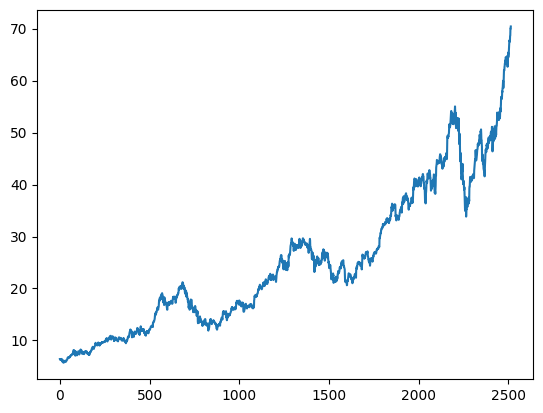

In [14]:
plt.plot(df.Close)

In [15]:
df

Price,index,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,0,6.424604,6.439314,6.375672,6.407193,493729600
1,1,6.435713,6.472038,6.401790,6.442318,601904800
2,2,6.333345,6.461231,6.326741,6.435714,552160000
3,3,6.321636,6.364265,6.275705,6.356760,477131200
4,4,6.363666,6.364267,6.276008,6.313232,447610800
...,...,...,...,...,...,...
2510,2510,68.589760,68.650138,67.713066,67.751709,98572000
2511,2511,68.654976,68.804720,68.328939,68.756415,48478800
2512,2512,70.017097,70.034005,68.758816,68.787796,93121200


In [17]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.073138
2511,57.270287
2512,57.506676
2513,57.734020


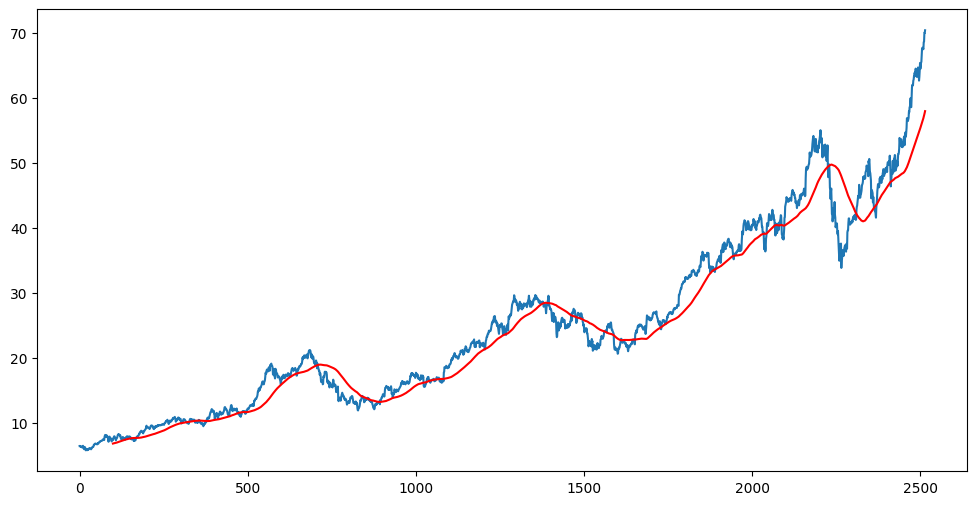

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [20]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.037091
2511,52.164216
2512,52.297196
2513,52.427629


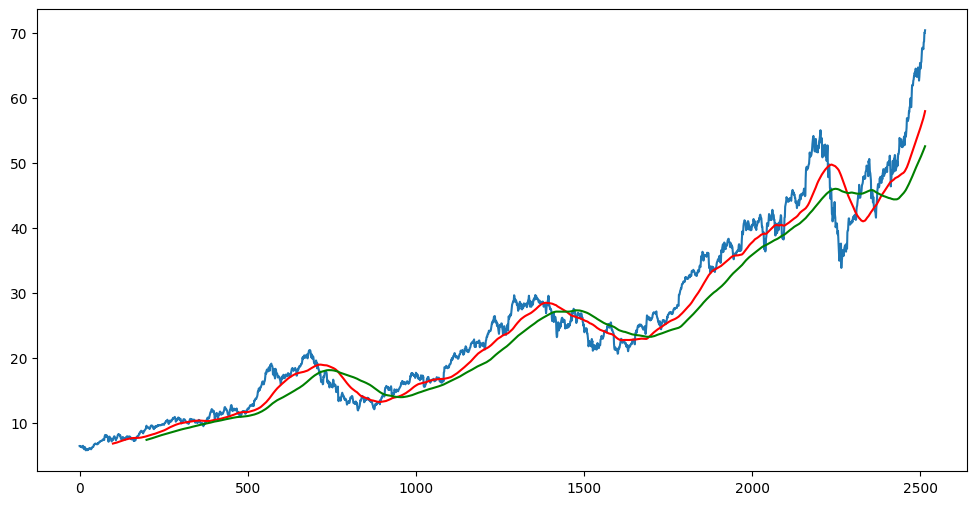

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [23]:
#training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [24]:
data_training.head()

Ticker,AAPL
0,6.424604
1,6.435713
2,6.333345
3,6.321636
4,6.363666


In [25]:
data_testing.head()

Ticker,AAPL
1760,26.930643
1761,26.720701
1762,26.796841
1763,26.766840
1764,26.902958


In [33]:
import sys
!{sys.executable} -m pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02759993],
       [0.02806501],
       [0.02377925],
       ...,
       [0.88408417],
       [0.89123195],
       [0.886402  ]], shape=(1760, 1))

In [38]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [41]:
#ml model 
import sys
!{sys.executable} -m pip install tensorflow

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [125]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(60, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(80, return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(120))  # ✅ REMOVE return_sequences=True here
model.add(Dropout(0.5))

model.add(Dense(1))


C:\Users\amees\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [126]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0300
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0072
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0067
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0065
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0063
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0058
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0050
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0055
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0049
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0050
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0049
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0047
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0044
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0046
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0047
Epoc

In [128]:
model.save('keras_model.h5')

In [129]:
data_testing.head()

Ticker,AAPL
1760,26.930643
1761,26.720701
1762,26.796841
1763,26.766840
1764,26.902958


In [130]:
past_100_days = data_training.tail(100)


In [131]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [132]:
final_df.head()

Ticker,AAPL
0,24.874210
1,24.975201
2,24.789286
3,24.773214
4,24.830597


In [133]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02573556],
       [0.02789649],
       [0.02391838],
       [0.0235745 ],
       [0.02480234],
       [0.0311872 ],
       [0.03069598],
       [0.0299101 ],
       [0.02922257],
       [0.03059795],
       [0.02642312],
       [0.02809301],
       [0.02406555],
       [0.02180646],
       [0.01871218],
       [0.01812293],
       [0.01409544],
       [0.01458674],
       [0.01768085],
       [0.02259238],
       [0.02244489],
       [0.02568642],
       [0.01173807],
       [0.        ],
       [0.01134529],
       [0.02367281],
       [0.04243417],
       [0.06109746],
       [0.05790503],
       [0.05132374],
       [0.0512746 ],
       [0.05117657],
       [0.05643166],
       [0.04705104],
       [0.04788574],
       [0.04891715],
       [0.05314095],
       [0.0444479 ],
       [0.04872084],
       [0.04611766],
       [0.04847523],
       [0.04872084],
       [0.05284621],
       [0.05368119],
       [0.06345495],
       [0.06468271],
       [0.06979047],
       [0.068

In [134]:
input_data.shape

(855, 1)

In [135]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i])

x_test = np.array(x_test)
y_test = np.array(y_test)



In [136]:
#predicting
y_predicted = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [137]:
y_predicted.shape

(755, 1)

In [138]:
y_test

array([[0.06973803],
       [0.0652458 ],
       [0.066875  ],
       [0.06623306],
       [0.06914564],
       [0.07556331],
       [0.08089464],
       [0.08148716],
       [0.08464669],
       [0.08217828],
       [0.08114164],
       [0.08588074],
       [0.08583136],
       [0.08479452],
       [0.08588074],
       [0.0862756 ],
       [0.08573263],
       [0.09516153],
       [0.09545759],
       [0.09550701],
       [0.09392741],
       [0.09254513],
       [0.1290759 ],
       [0.1279898 ],
       [0.13070493],
       [0.13667824],
       [0.1427995 ],
       [0.14531726],
       [0.15002759],
       [0.14853977],
       [0.15434069],
       [0.16291808],
       [0.16534756],
       [0.16455437],
       [0.16638873],
       [0.17124761],
       [0.17328011],
       [0.17040475],
       [0.1710491 ],
       [0.17238787],
       [0.17268531],
       [0.18656771],
       [0.18245275],
       [0.18651792],
       [0.18433649],
       [0.1852289 ],
       [0.18265086],
       [0.181

In [139]:
y_predicted

array([[0.06384809],
       [0.06455055],
       [0.0647786 ],
       [0.06458291],
       [0.06405964],
       [0.0634014 ],
       [0.06293777],
       [0.06301819],
       [0.06379895],
       [0.06529331],
       [0.06728768],
       [0.06946005],
       [0.0716376 ],
       [0.07370448],
       [0.07554264],
       [0.07709265],
       [0.0783443 ],
       [0.07929796],
       [0.08020577],
       [0.08127514],
       [0.08256777],
       [0.08398408],
       [0.08534048],
       [0.08740461],
       [0.09071851],
       [0.09535666],
       [0.10111496],
       [0.10767822],
       [0.11463112],
       [0.12160176],
       [0.12816519],
       [0.13409859],
       [0.13948275],
       [0.14443767],
       [0.14894815],
       [0.1529643 ],
       [0.15654314],
       [0.15976572],
       [0.16257198],
       [0.1648938 ],
       [0.16673341],
       [0.16813567],
       [0.16953216],
       [0.17112443],
       [0.17301339],
       [0.17509048],
       [0.17718938],
       [0.179

In [140]:
scaler.scale_

array([0.02139748])

In [141]:
# reshape predicted and test values to 2D
y_predicted = y_predicted.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# inverse scaling
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test)


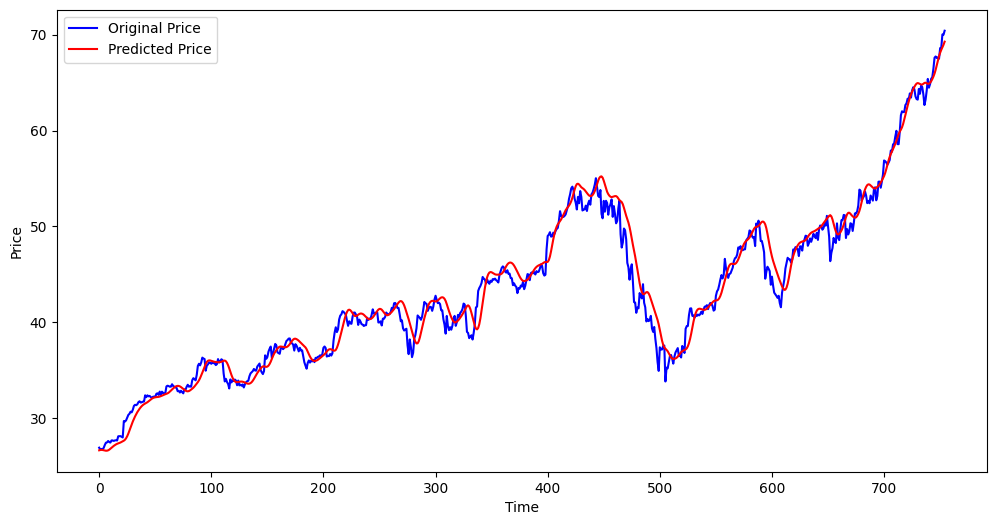

In [142]:
plt.figure(figsize=(12, 6))
plt.plot(y_test , 'b', label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
